In [12]:
from preprocess import proc
import freq
from freq import read_kw, word_list2freq_dict
from importlib import reload
import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
reload(freq)


def cross_validation(model, X, y, scorer, cv=5):
    return cross_validate(estimator=model,
                          X=X,
                          y=y,
                          cv=cv,
                          scoring=scorer,
                          return_train_score=True)


def scor(y, y_pred):
    t_pt = [i * j for i in y for j in y_pred]
    f_pf = [(1 - i) * (1 - j) for i in y for j in y_pred]
    return sum(t_pt) * sum(f_pf) / (sum(y_pred) * (len(y_pred) - sum(y_pred)))


kw = read_kw()

train = pd.read_csv("./train.csv")[['target', 'comment_text']]
test = pd.read_csv("./test.csv")[['comment_text']]
train['toxic'] = 1 * (train['target'] > 0.5)

train_toxic = train[train['toxic'] == 1]
train_not_toxic = train[train['toxic'] == 0].sample(len(train_toxic))
train = pd.concat([train_toxic, train_not_toxic])

def comment_text_to_vec(comment_text):
    p = proc(comment_text, [1, 2])
    return word_list2freq_dict(kw, p)


train["comment"] = train['comment_text'].apply(comment_text_to_vec)




0.6541739953998105
0.6686154233598963
0.5384605748573504
0.5197204006088051
              precision    recall  f1-score   support

           0       0.58      0.13      0.21     26547
           1       0.51      0.91      0.65     26672

    accuracy                           0.52     53219
   macro avg       0.55      0.52      0.43     53219
weighted avg       0.55      0.52      0.43     53219



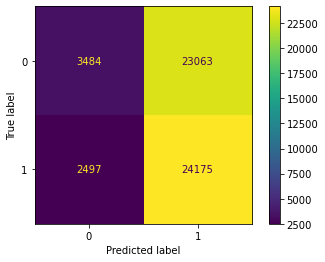

In [13]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.6550378141010003
0.6585918115545754
0.5268544442147854
0.521749751028768
              precision    recall  f1-score   support

           0       0.59      0.14      0.22     26529
           1       0.51      0.91      0.66     26690

    accuracy                           0.52     53219
   macro avg       0.55      0.52      0.44     53219
weighted avg       0.55      0.52      0.44     53219



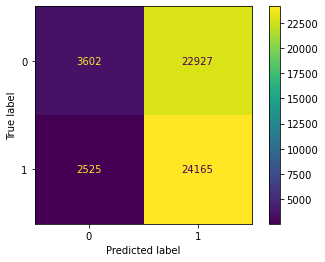

In [14]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.5362828303118566
0.5606277698177335
0.6696417945971677
0.652981078186362
              precision    recall  f1-score   support

           0       0.60      0.90      0.72     26644
           1       0.81      0.40      0.54     26575

    accuracy                           0.65     53219
   macro avg       0.70      0.65      0.63     53219
weighted avg       0.70      0.65      0.63     53219



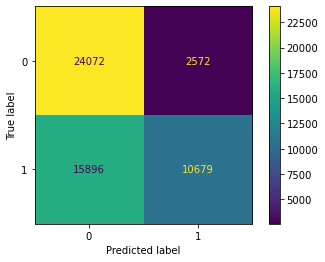

In [15]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=3, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.560092062045983
0.5770267985799732
0.6709007434688112
0.6552171217046544
              precision    recall  f1-score   support

           0       0.60      0.88      0.72     26364
           1       0.79      0.43      0.56     26855

    accuracy                           0.66     53219
   macro avg       0.70      0.66      0.64     53219
weighted avg       0.70      0.66      0.64     53219



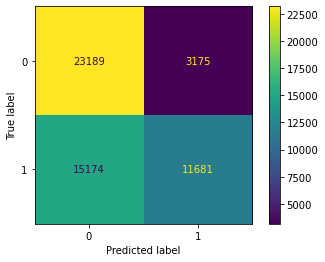

In [16]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=3, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.5613860894603584
0.5892863013248298
0.6869914880024052
0.6679757229560871
              precision    recall  f1-score   support

           0       0.61      0.91      0.73     26628
           1       0.83      0.43      0.56     26591

    accuracy                           0.67     53219
   macro avg       0.72      0.67      0.65     53219
weighted avg       0.72      0.67      0.65     53219



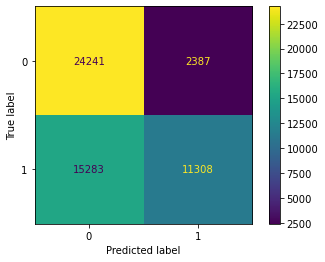

In [17]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=7, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=7, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

In [ ]:
train.shape